In [34]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

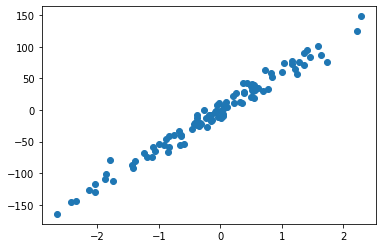

In [2]:
X_gen,y_gen = datasets.make_regression(n_samples=100,n_features=1,noise=10,random_state=2)
plt.scatter(X_gen,y_gen)
plt.show()

In [3]:
X = torch.from_numpy(X_gen.astype(np.float32))
y = torch.from_numpy(y_gen.astype(np.float32))

In [4]:
y = y.view(-1,1)

In [5]:
n_samples,n_features = X.shape

In [6]:
model = nn.Linear(1,1)

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [8]:
epochs = 800
loss_list = []

for epoch in range(epochs):
    
    y_pred = model(X)
    loss = criterion(y_pred,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_list.append(loss.item())
    if(epoch+1)%100 == 0:
        print(f'epoch:{epoch+1},loss ={loss.item():4f}')

epoch:100,loss =138.421341
epoch:200,loss =88.091331
epoch:300,loss =87.291641
epoch:400,loss =87.276466
epoch:500,loss =87.276146
epoch:600,loss =87.276146
epoch:700,loss =87.276146
epoch:800,loss =87.276146


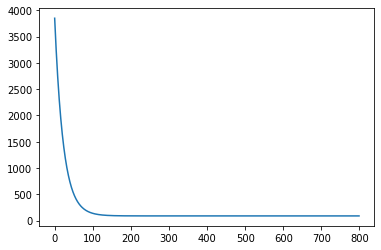

In [10]:
plt.plot(loss_list)

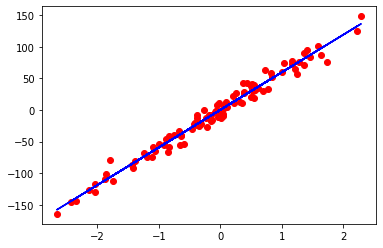

In [13]:
with torch.no_grad():
    predicted_y = model(X).detach().numpy()
    
    plt.plot(X_gen,y_gen,'ro')
    plt.plot(X_gen,predicted_y,'b')
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [17]:
data = datasets.load_breast_cancer()
df_X = pd.DataFrame(data.data,columns=data.feature_names)
df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df_y = pd.DataFrame(data.target,columns=['target'])

In [20]:
df_y[100:300]

,target
100,0
101,1
102,1
103,1
104,1
...,...
295,1
296,1
297,0
298,1


In [21]:
data = datasets.load_breast_cancer()

In [22]:
X,y = data.data,data.target

In [23]:
n_samples,n_features = X.shape

In [24]:
X.shape

(569, 30)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [26]:
sc = StandardScaler()

In [27]:
X_train=sc.fit_transform(X_train)

In [28]:
X_test = sc.transform(X_test)

In [30]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [31]:
y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

In [36]:
class Model(nn.Module):
    def __init__(self,in_features):
        super(Model,self).__init__()
        self.linear = nn.Linear(in_features,1)
        
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [37]:
model = Model(n_features)

In [38]:
epochs = 1000
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
loss_list = []

In [39]:
for epoch in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_list.append(loss.item())
    
    if(epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 100, loss=0.2510
epoch: 200, loss=0.1851
epoch: 300, loss=0.1562
epoch: 400, loss=0.1393
epoch: 500, loss=0.1279
epoch: 600, loss=0.1196
epoch: 700, loss=0.1133
epoch: 800, loss=0.1082
epoch: 900, loss=0.1041
epoch: 1000, loss=0.1006


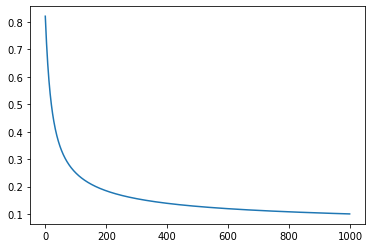

In [40]:
plt.plot(loss_list)

In [45]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_0_1 = y_predicted.round()
    acc = y_predicted_0_1.eq(y_test).sum()/float(y_test.shape[0])
    print(round(acc.item(),3))

0.982


In [44]:
y_predicted_0_1

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
      